### <code style="background:black;color:white">Importing Libraries

In [348]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)
%matplotlib inline
from datetime import datetime
from matplotlib import dates as mpl_dates

### <code style="background:black;color:white">Reading the data set from excel file

In [664]:
df=pd.read_excel('DS_ML Coding Challenge Dataset.xlsx',sheet_name='Training Dataset')
df.head()

,ProductType,Manufacturer,Area Code,Sourcing Channel,Product Size,Product Type,Month of Sourcing,Sourcing Cost
0,NTM3,X1,A28,WHOLESALE,Large,Powder,2021-05-01,10.158
1,NTM2,X1,A9,DIRECT,Large,Powder,2020-10-01,134.281
2,NTM3,X2,A20,DIRECT,Large,Powder,2020-12-01,12.456
3,NTM3,X1,A18,WHOLESALE,Small,Powder,2021-02-01,107.220
4,NTM2,X1,A28,DIRECT,Large,Liquid,2020-11-01,197.763


### <code style="background:black;color:white">Checking the data

In [647]:
df.shape

(550176, 8)

In [648]:
df.isna().any().any()

False

In [649]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550176 entries, 0 to 550175
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   ProductType        550176 non-null  object        
 1   Manufacturer       550176 non-null  object        
 2   Area Code          550176 non-null  object        
 3   Sourcing Channel   550176 non-null  object        
 4   Product Size       550176 non-null  object        
 5   Product Type       550176 non-null  object        
 6   Month of Sourcing  550176 non-null  datetime64[ns]
 7   Sourcing Cost      550176 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(6)
memory usage: 33.6+ MB


### <code style="background:black;color:white">Checking unique values in data set

In [154]:
for i in df.columns:
    if df[i].dtype == 'object':
        print('The unique values in',i,'are',df[i].unique(),'& the count of unique objects are',df[i].nunique())
        print('')

The unique values in ProductType are ['NTM3' 'NTM2' 'NTM1'] & the count of unique objects are 3

The unique values in Manufacturer are ['X1' 'X2' 'X3'] & the count of unique objects are 3

The unique values in Area Code are ['A28' 'A9' 'A20' 'A18' 'A10' 'A19' 'A29' 'A7' 'A2' 'A8' 'A4' 'A6' 'A30'
 'A35' 'A44' 'A45' 'A31' 'A25' 'A37' 'A32' 'A34' 'A46' 'A11' 'A39' 'A41'
 'A17' 'A38' 'A5' 'A22' 'A3' 'A12' 'A24' 'A36' 'A42' 'A14' 'A43' 'A33'
 'A15' 'A40' 'A21' 'A16' 'A13' 'A1' 'A23' 'A26'] & the count of unique objects are 45

The unique values in Sourcing Channel are ['WHOLESALE' 'DIRECT' 'RETAIL' 'ECOM'] & the count of unique objects are 4

The unique values in Product Size are ['Large' 'Small' 'ExtraLarge'] & the count of unique objects are 3

The unique values in Product Type are ['Powder' 'Liquid'] & the count of unique objects are 2



### <code style="background:black;color:white">Checking duplication

In [155]:
df[df.duplicated()]

,ProductType,Manufacturer,Area Code,Sourcing Channel,Product Size,Product Type,Month of Sourcing,Sourcing Cost
63,NTM2,X1,A29,DIRECT,Small,Powder,2020-07-01,56.520
68,NTM2,X2,A25,DIRECT,Small,Powder,2020-11-01,6.773
86,NTM1,X1,A7,ECOM,Small,Powder,2020-09-01,138.404
88,NTM2,X1,A7,ECOM,Large,Powder,2020-11-01,140.449
93,NTM2,X1,A19,DIRECT,Large,Powder,2020-09-01,105.589
...,...,...,...,...,...,...,...,...
550171,NTM2,X1,A5,DIRECT,Large,Powder,2020-07-01,136.469
550172,NTM3,X1,A14,DIRECT,Large,Liquid,2020-10-01,72.559
550173,NTM2,X1,A5,DIRECT,Small,Powder,2021-03-01,147.639
550174,NTM2,X1,A7,DIRECT,Small,Powder,2021-02-01,150.044


### <code style="background:black;color:white">Replaced space in column names with the character _ for easier handling of data

In [665]:
df.columns = [c.replace(' ', '_') for c in df.columns]
df.head(2)

,ProductType,Manufacturer,Area_Code,Sourcing_Channel,Product_Size,Product_Type,Month_of_Sourcing,Sourcing_Cost
0,NTM3,X1,A28,WHOLESALE,Large,Powder,2021-05-01,10.158
1,NTM2,X1,A9,DIRECT,Large,Powder,2020-10-01,134.281


# <code style="background:black;color:white">Exploratory data analysis

In [651]:
df.describe()

,Sourcing_Cost
count,550176.000000
mean,108.816793
std,104.390097
min,-196.070000
25%,57.000000
50%,132.000000
75%,146.147000
max,32632.500000


### <code style="background:black;color:white">The max value of the data is far from the mean and median. It seems the data has outliers present.
### <code style="background:black;color:white"> Mean and median values are not very far, though it seems that the data is slightly left skewed (as mean < median). 

### <code style="background:black;color:white">The data also has negative sourcing cost which will have to be treated

### <code style="background:black;color:white">I have not removed the duplicated rows for EDA part as these are true instances of an object being bought. 
### <code style="background:black;color:white">however while applying the model, duplicates have been removed. 

<AxesSubplot:xlabel='Sourcing_Cost'>

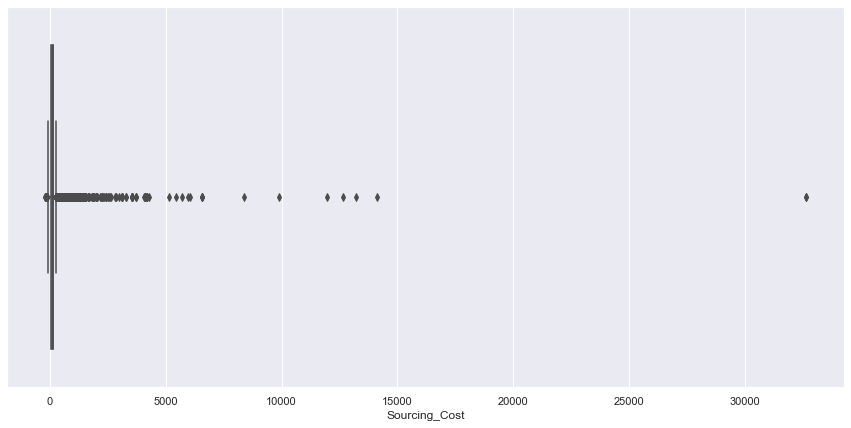

In [652]:
plt.figure(figsize=(15,7))
sns.boxplot(x=df['Sourcing_Cost'])

### <code style="background:black;color:white">Removing rows where the values of Sourcing cost > 5000, as these values are extremely far from the median

<AxesSubplot:xlabel='Sourcing_Cost'>

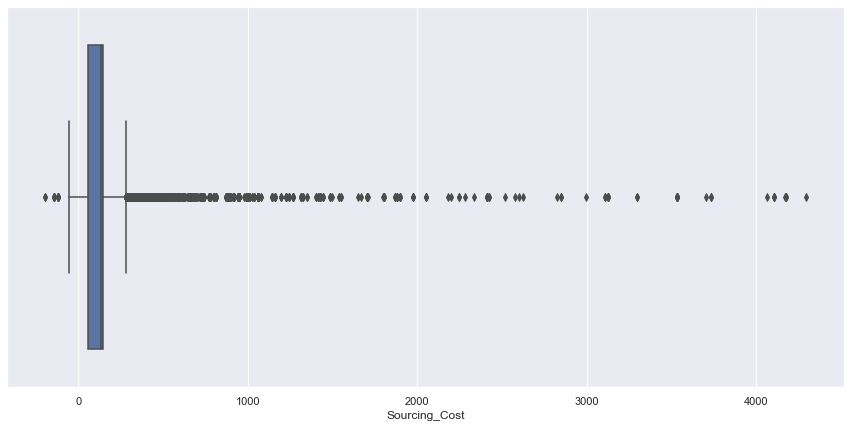

In [666]:
plt.figure(figsize=(15,7))
df.drop(df[(df['Sourcing_Cost']>5000)].index,inplace=True)
sns.boxplot(x=df['Sourcing_Cost'])

### <code style="background:black;color:white">Imputing the values where Sourcing_Cost has negative values by the mean of those values

In [668]:
df.Sourcing_Cost= np.where(df.Sourcing_Cost < 0, df.Sourcing_Cost.mean(),df.Sourcing_Cost)
df[df.Sourcing_Cost < 0].sum()

ProductType         0.0
Manufacturer        0.0
Area_Code           0.0
Sourcing_Channel    0.0
Product_Size        0.0
Product_Type        0.0
Sourcing_Cost       0.0
dtype: float64

### <code style="background:black;color:white">Checking and treating all outliers

In [655]:
Q1 = np.percentile(df['Sourcing_Cost'], 25, interpolation = 'midpoint') 
Q3 = np.percentile(df['Sourcing_Cost'], 75,interpolation = 'midpoint') 
IQR = Q3 - Q1
upper = (Q3+1.5*IQR)
lower = (Q1-1.5*IQR)
print(df[(df['Sourcing_Cost']>upper)].count()[0])
print(df[(df['Sourcing_Cost']<lower)].count()[0])

2643
0


In [656]:
df[df['Sourcing_Cost']>upper]

,ProductType,Manufacturer,Area_Code,Sourcing_Channel,Product_Size,Product_Type,Month_of_Sourcing,Sourcing_Cost
495,NTM2,X1,A29,DIRECT,Small,Powder,2021-01-01,334.881
533,NTM3,X1,A35,DIRECT,Small,Liquid,2020-11-01,342.400
551,NTM2,X1,A29,DIRECT,Small,Powder,2021-01-01,334.881
579,NTM3,X1,A35,DIRECT,Small,Liquid,2021-02-01,401.250
1098,NTM2,X1,A29,DIRECT,Small,Powder,2020-12-01,1033.509
...,...,...,...,...,...,...,...,...
549588,NTM2,X1,A29,DIRECT,Large,Powder,2021-03-01,483.952
549589,NTM2,X1,A29,DIRECT,Large,Powder,2021-02-01,495.223
549942,NTM3,X1,A35,DIRECT,ExtraLarge,Powder,2020-10-01,3705.000
549946,NTM2,X1,A38,DIRECT,Small,Powder,2020-10-01,457.143


In [657]:
df[df['Sourcing_Cost']>upper].duplicated().sum()

2380

### <code style="background:black;color:white">Out of a total of 2643 outliers, 2380 rows are duplicates. 
### <code style="background:black;color:white">As the % of outliers are much less (0.4%) removing them shouldn't cause loss of variability

<AxesSubplot:xlabel='Product_Type', ylabel='Sourcing_Cost'>

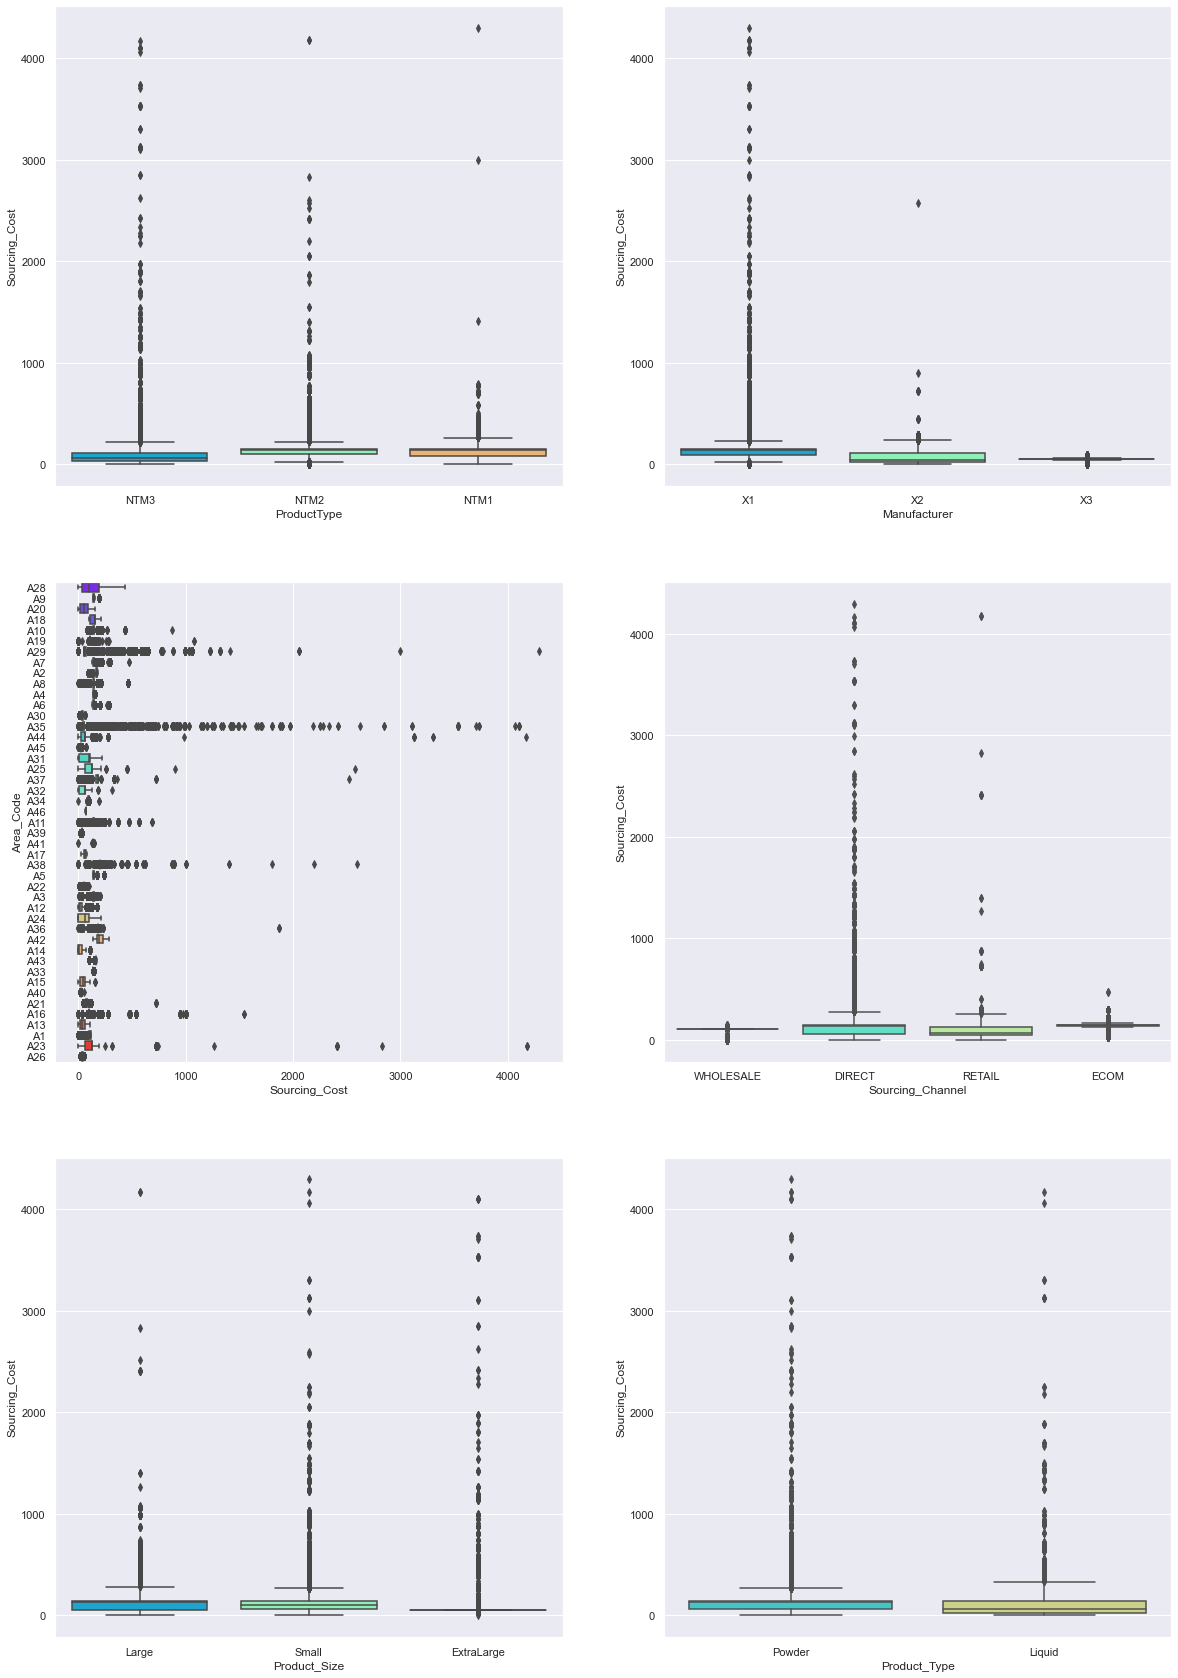

In [292]:
fig,axes = plt.subplots(3,2,figsize=(20,30))
sns.boxplot(ax=axes[0,0],y="Sourcing_Cost",x='ProductType',data=df,palette='rainbow')
sns.boxplot(ax=axes[0,1],y="Sourcing_Cost",x='Manufacturer',data=df,palette='rainbow')
sns.boxplot(ax=axes[1,0],x="Sourcing_Cost",y='Area_Code',data=df,palette='rainbow')
sns.boxplot(ax=axes[1,1],y="Sourcing_Cost",x='Sourcing_Channel',data=df,palette='rainbow')
sns.boxplot(ax=axes[2,0],y="Sourcing_Cost",x='Product_Size',data=df,palette='rainbow')
sns.boxplot(ax=axes[2,1],y="Sourcing_Cost",x='Product_Type',data=df,palette='rainbow')

###  <code style="background:black;color:white">Moreover, it doesn't seem that the outliers are related to some specific feature (i.e: the presence of outliers is random)

### <code style="background:black;color:white">Removing Outliers

<AxesSubplot:xlabel='Sourcing_Cost'>

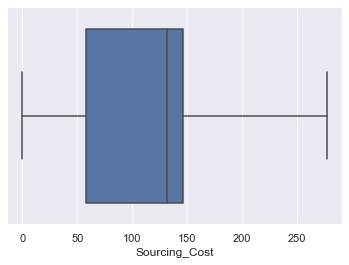

In [669]:
df.drop(df[df['Sourcing_Cost']>upper].index,inplace=True)
sns.boxplot(x='Sourcing_Cost',data=df)

In [301]:
df.describe()

,Sourcing_Cost
count,547517.000000
mean,106.755638
std,55.391775
min,0.000000
25%,57.710000
50%,131.202000
75%,145.918000
max,276.941000


### <code style="background:black;color:white">The mean and median values of the data hasn't changed significantly than the prevous values. The data provided is left skewed.

# <code style="background:black;color:white">Data Visualization

### Univariate Analysis

<AxesSubplot:xlabel='Product_Type', ylabel='count'>

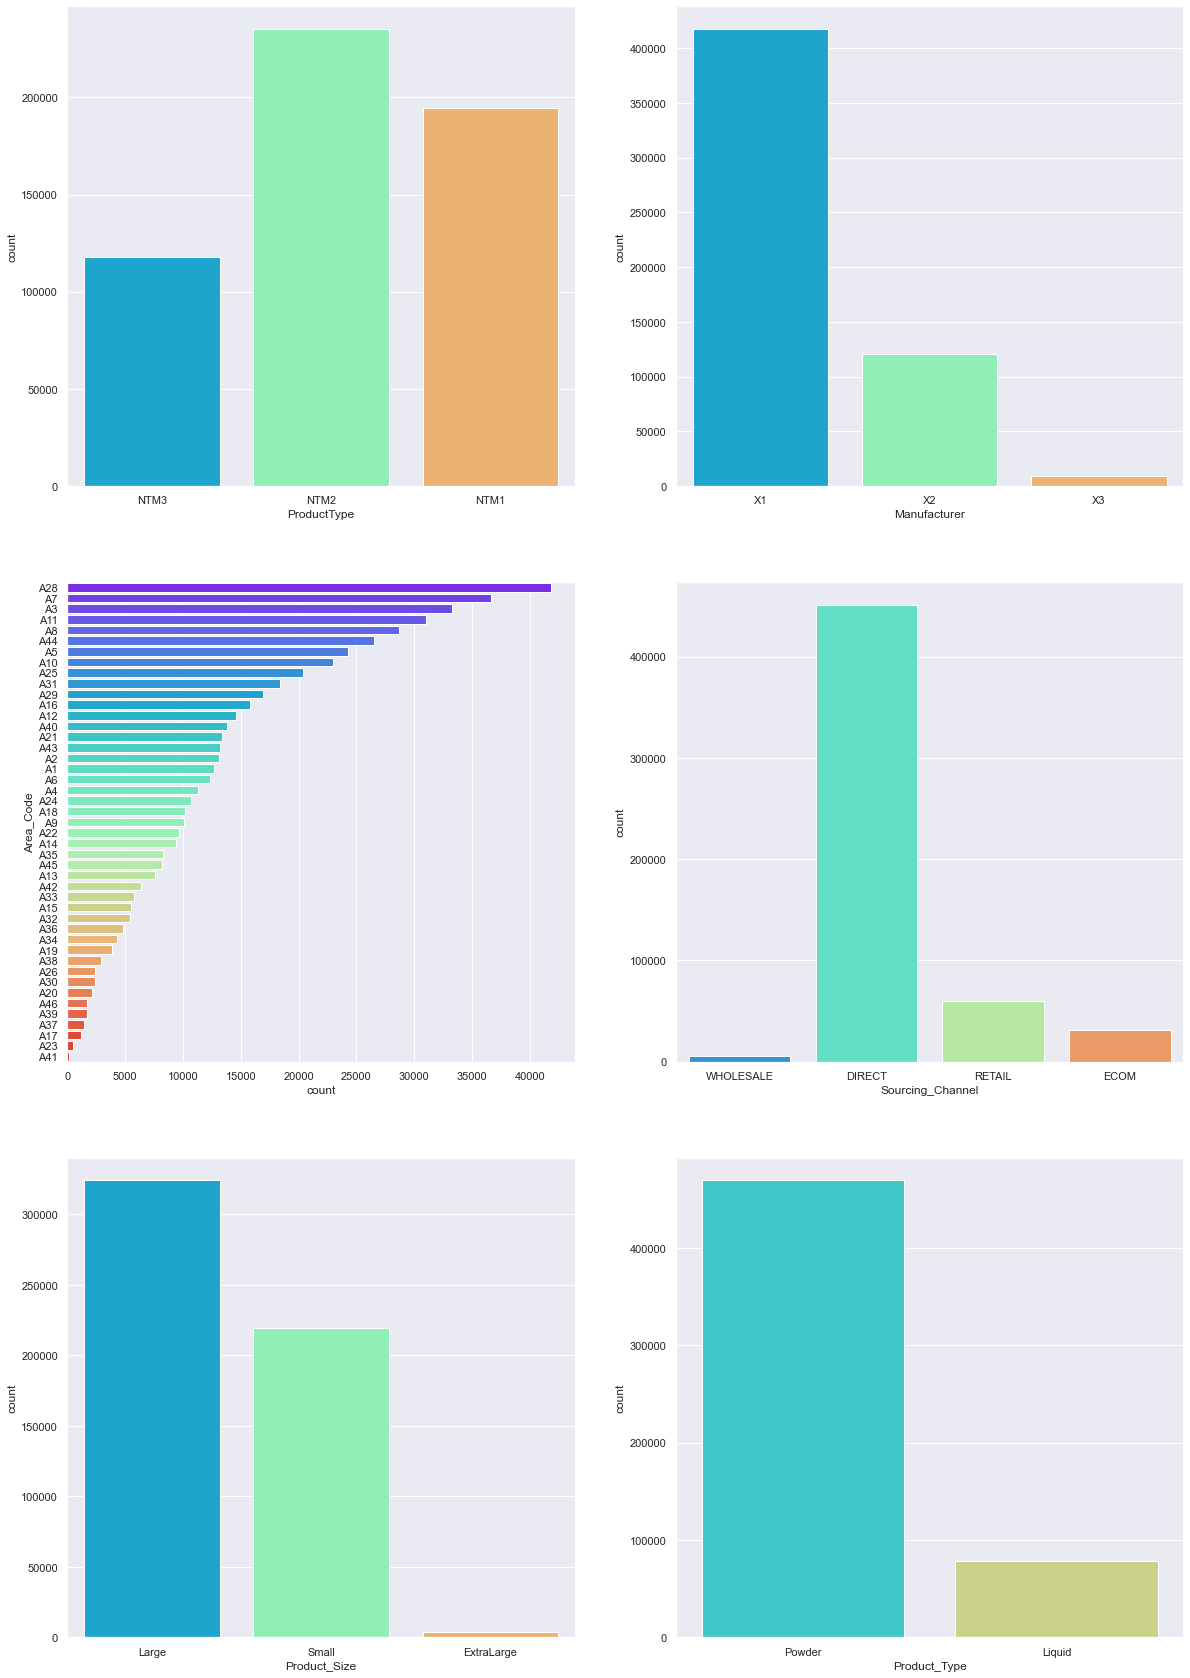

In [312]:
fig,axes = plt.subplots(3,2,figsize=(20,30))
sns.countplot(ax=axes[0,0],x='ProductType',data=df,palette='rainbow')
sns.countplot(ax=axes[0,1],x='Manufacturer',data=df,palette='rainbow')
sns.countplot(ax=axes[1,0],y='Area_Code',order=df['Area_Code'].value_counts().index,data=df,palette='rainbow')
sns.countplot(ax=axes[1,1],x='Sourcing_Channel',data=df,palette='rainbow')
sns.countplot(ax=axes[2,0],x='Product_Size',data=df,palette='rainbow')
sns.countplot(ax=axes[2,1],x='Product_Type',data=df,palette='rainbow')

### Product Type: The number of times NTM3 product has been sourced is almost half the times NTM2. NTM1 has been sourced almost 1.5 X NTM3.
### Manufacturer: Almost 80% of the times, the product has been sourced from the manufacturer X1, at <5% of the instances the product has been sourced from X3.
### Area Code: The area code of A28 has sourced the maximum no. of products followed by A7 and A3. the areas A17, A23 and A41 have sourced the lowest (in descending order). 
### Sourcing Channel: almost 80% of the times, the sourcing channel is Direct. The instances when the sourcing channel is Wholesale is less than 5%
### Product Size:  The instances of purchase of product size Large and small are approximately in the ratio of 60:40. Extra-:arge products have been purchased at <1-2% of the occasion. 
### Product_type: 85% of the instances of purchase reflect a Powder form of the product being purchased.

## <code style="background:black;color:white">Bivariate analysis

<AxesSubplot:xlabel='ProductType', ylabel='count'>

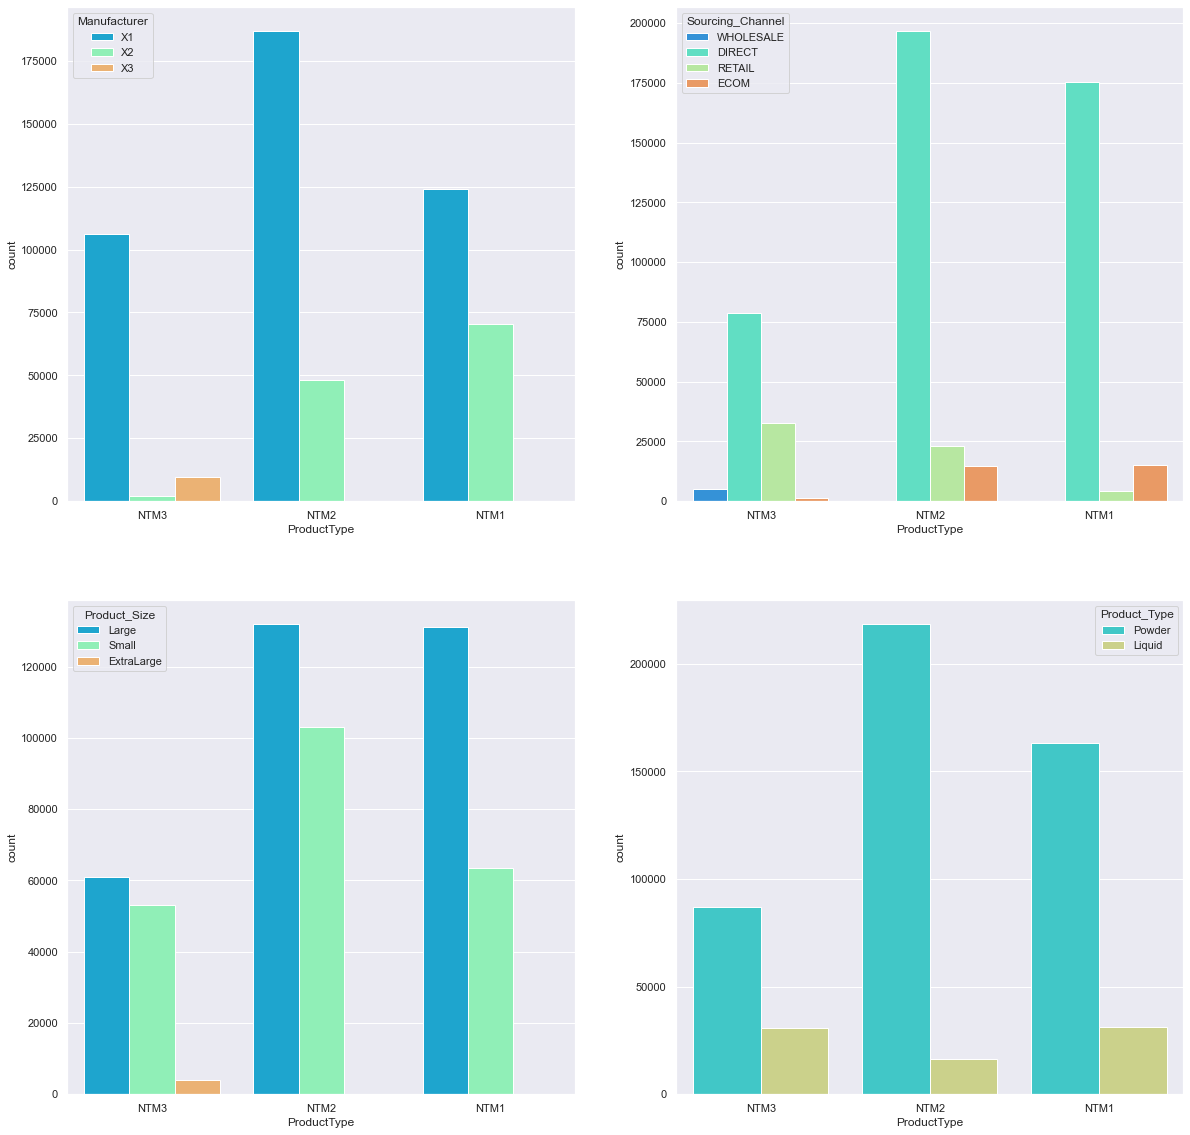

In [326]:
fig,axes = plt.subplots(2,2,figsize=(20,20))
sns.countplot(ax=axes[0,0],x='ProductType',hue='Manufacturer',data=df,palette='rainbow')
sns.countplot(ax=axes[0,1],x='ProductType',hue='Sourcing_Channel',data=df,palette='rainbow')
sns.countplot(ax=axes[1,0],x='ProductType',hue='Product_Size',data=df,palette='rainbow')
sns.countplot(ax=axes[1,1],x='ProductType',hue='Product_Type',data=df,palette='rainbow')

### Insights: 
### 1.The manufacturer X3 has supplied only the NTM3 product type.
### 2. Although the instances of NTM2 being bought is more than NTM1, the instances of X2 supplying NTM1 is higher than NTM2. 
### 3. Only product type NTM3 has been sourced from the wholesale channel.  
### 4. Extra-Large products have been purchased only for the type NTM3. FOr NTM1, Large size products have been sourced almost twice as many times as Small sized. 
### 5. The (% of total purchases) when the type of product is Liquid is highest for NTM3 followed by NTM1 and lowest for NTM2.

<AxesSubplot:xlabel='count', ylabel='Manufacturer'>

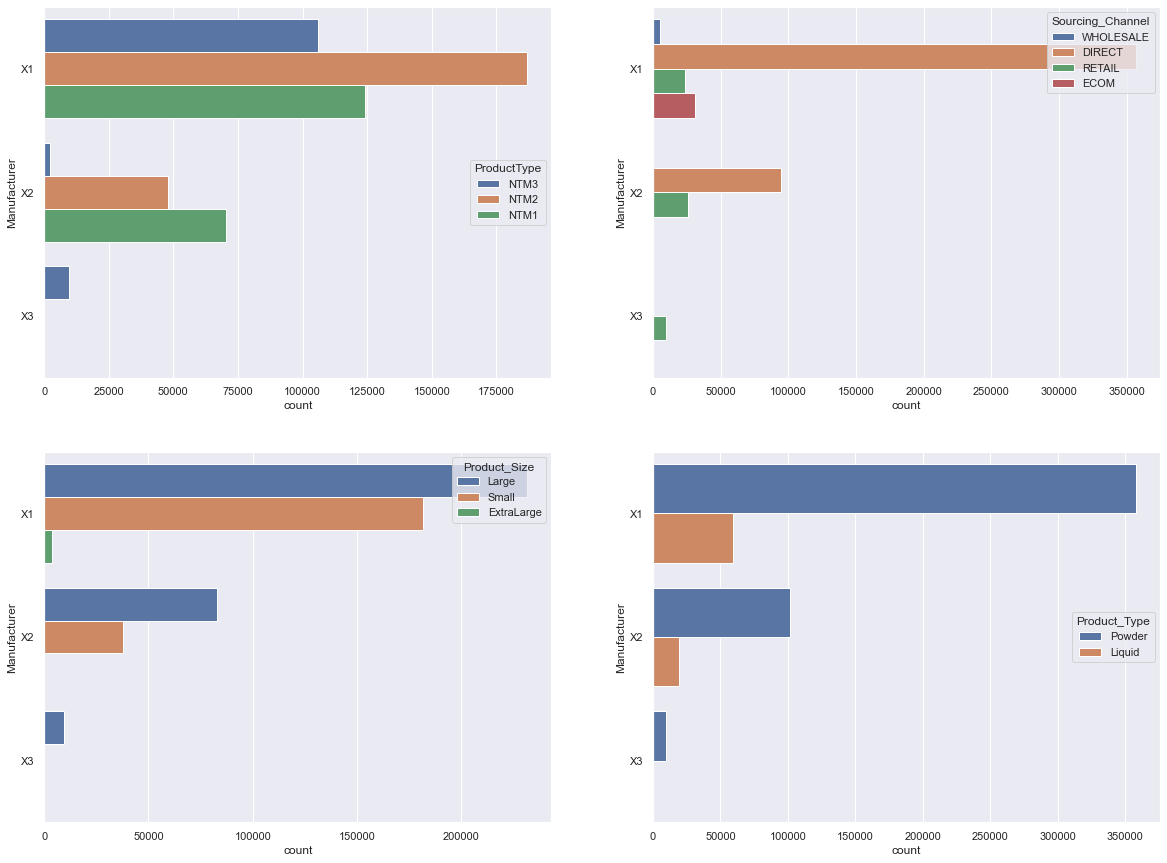

In [338]:
fig,axes = plt.subplots(2,2,figsize=(20,15))
sns.countplot(ax=axes[0,0],y='Manufacturer',hue='ProductType',data=df)
sns.countplot(ax=axes[0,1],y='Manufacturer',hue='Sourcing_Channel',data=df)
sns.countplot(ax=axes[1,0],y='Manufacturer',hue='Product_Size',data=df)
sns.countplot(ax=axes[1,1],y='Manufacturer',hue='Product_Type',data=df)

### Possibly, the manufacturer X1 only has the NTM3 type products. Manufacturer X2 is a smaller supplier and majorly has NTM1 products and also very low supplies of NTM3 products. X1 seems to be a majpr supplier who has all varities of products. 
### It is also possible that the pricing of the supplier X1 is lower than X2 and X3 has the highest price quotations. 
### X1 prefers direct sourcing channel majority of the times. X2 prefers direct channel almost 3X times as retail, and has not dealt via wholesale and ecom channels. X3 has only dealt via Retail channel.
### Extra-large products have been purchased only through X1. X3 has supplied only Large products
### X3 has supplied only Powder form of products. For both X1 and X2, liquid form of products supplied are much lower than the powder form. 

<AxesSubplot:xlabel='count', ylabel='Sourcing_Channel'>

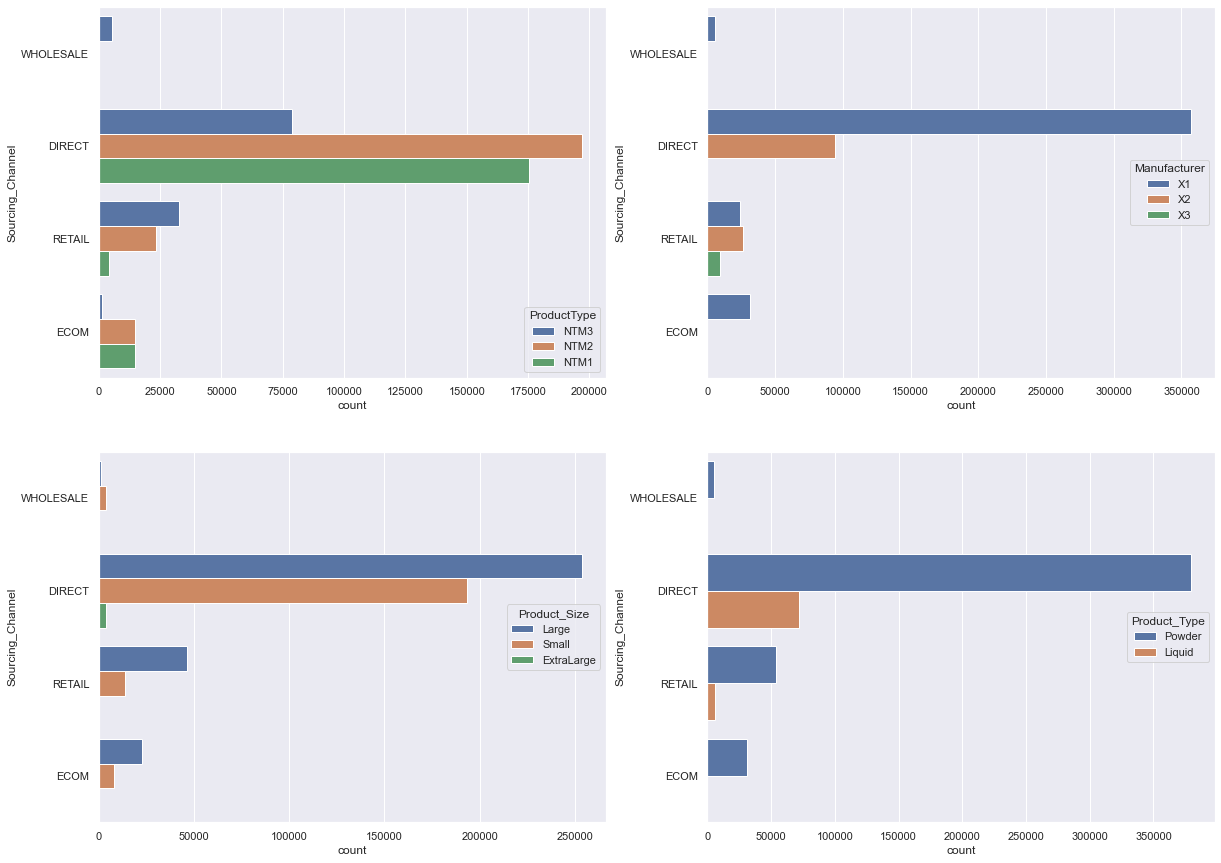

In [340]:
fig,axes = plt.subplots(2,2,figsize=(20,15))
sns.countplot(ax=axes[0,0],y='Sourcing_Channel',hue='ProductType',data=df)
sns.countplot(ax=axes[0,1],y='Sourcing_Channel',hue='Manufacturer',data=df)
sns.countplot(ax=axes[1,0],y='Sourcing_Channel',hue='Product_Size',data=df)
sns.countplot(ax=axes[1,1],y='Sourcing_Channel',hue='Product_Type',data=df)

### Wholesale channel of supply has been used only for the product NTM3. Retail is the most preffered channel for NTM3 while Ecom is least preffered 
### Extralarge products are sourced only via direct channel (and only through X1 manufacturer as seen earlier)
### Liquid product forms are not supplied via Wholesale and ecom channel.

<AxesSubplot:xlabel='count', ylabel='Product_Size'>

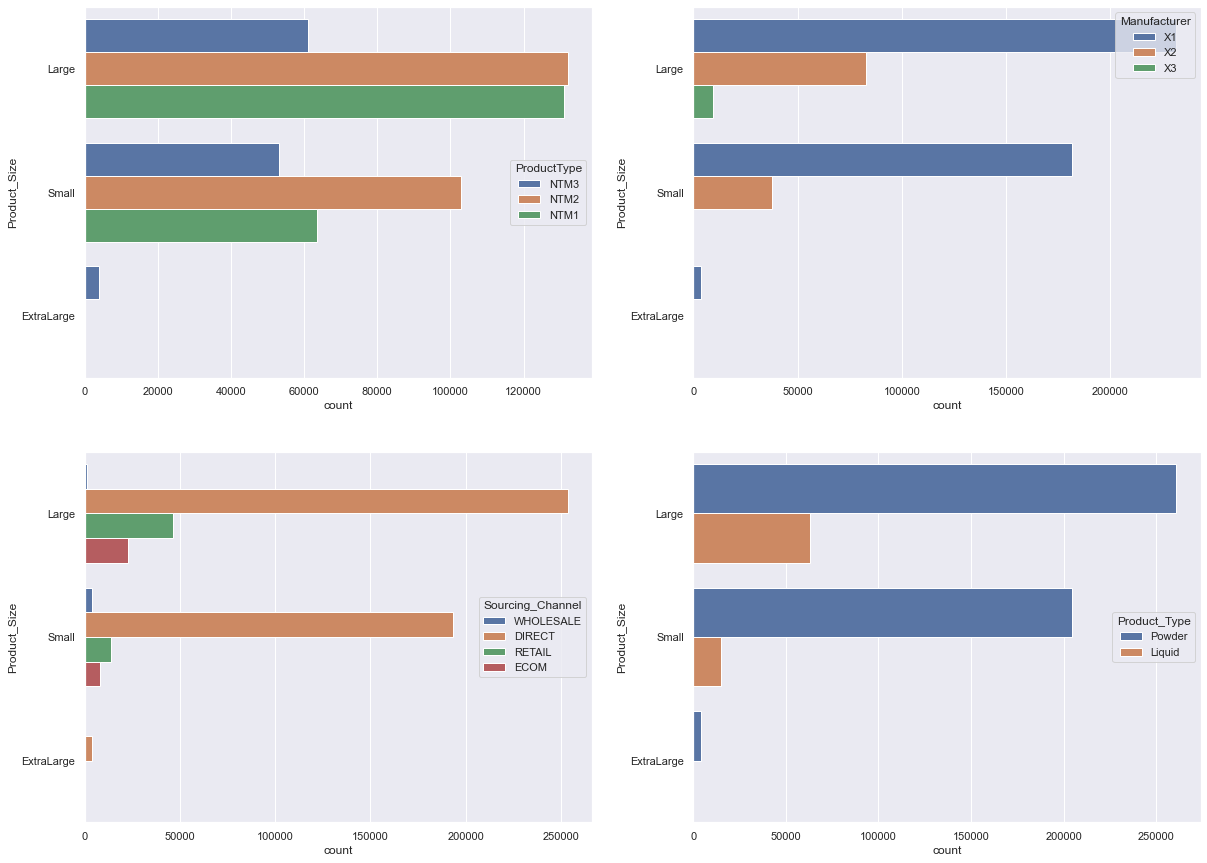

In [341]:
fig,axes = plt.subplots(2,2,figsize=(20,15))
sns.countplot(ax=axes[0,0],y='Product_Size',hue='ProductType',data=df)
sns.countplot(ax=axes[0,1],y='Product_Size',hue='Manufacturer',data=df)
sns.countplot(ax=axes[1,0],y='Product_Size',hue='Sourcing_Channel',data=df)
sns.countplot(ax=axes[1,1],y='Product_Size',hue='Product_Type',data=df)

### Although the product size doesn't make any sense when the product form is liquid, I am assuming that the size refers to the size of some container it is being bought in. Liquid has  not been purchased in the extra large size. 
### the attribute of size for powder may mean the size the particle of the powder pellets or again the size of the containers in which the powder has been purchased. Powder products have been majorly bought in the size Large.

<AxesSubplot:xlabel='count', ylabel='Product_Type'>

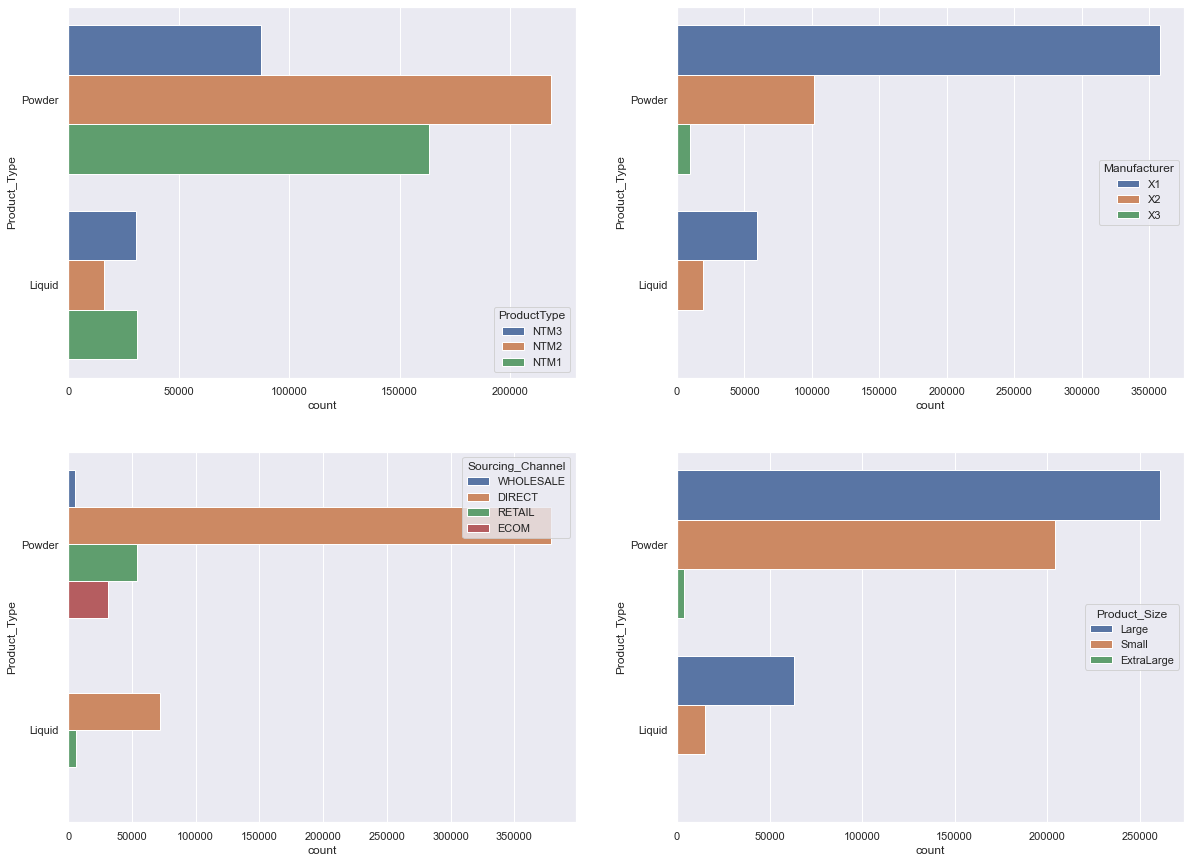

In [342]:
fig,axes = plt.subplots(2,2,figsize=(20,15))
sns.countplot(ax=axes[0,0],y='Product_Type',hue='ProductType',data=df)
sns.countplot(ax=axes[0,1],y='Product_Type',hue='Manufacturer',da`ta=df)
sns.countplot(ax=axes[1,0],y='Product_Type',hue='Sourcing_Channel',data=df)
sns.countplot(ax=axes[1,1],y='Product_Type',hue='Product_Size',data=df)

### Just a repitative graph, since all the combinations with the feature of product_type have been captured above. 

### I have not analysed combinations with the feature 'Area Code' using the subplots methods due to the high no. of levels . 

In [675]:
df.sort_values(by='Month_of_Sourcing',ascending=True,inplace=True)

In [676]:
df['Month_of_Sourcing']=df.Month_of_Sourcing.dt.strftime('%b-%Y')
df.head()

,ProductType,Manufacturer,Area_Code,Sourcing_Channel,Product_Size,Product_Type,Month_of_Sourcing,Sourcing_Cost
0,NTM3,X1,A28,WHOLESALE,Large,Powder,May-2021,10.158
441613,NTM3,X1,A44,DIRECT,Small,Liquid,May-2021,65.656
483842,NTM1,X1,A33,DIRECT,Large,Powder,May-2021,133.300
483570,NTM2,X1,A3,DIRECT,Small,Powder,May-2021,145.689
483523,NTM1,X2,A43,DIRECT,Small,Powder,May-2021,172.526


<AxesSubplot:xlabel='Sourcing_Cost', ylabel='Month_of_Sourcing'>

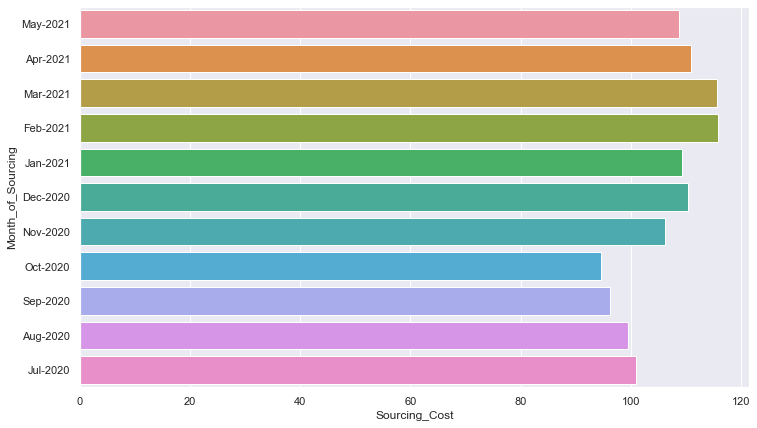

In [677]:
plt.figure(figsize=(12,7))
sns.barplot(y='Month_of_Sourcing',x='Sourcing_Cost',data=df,ci=None)

### It seems that the products bought decreased in Autumn (Sep-Oct) and increased in spring (Feb-March). Can't be said certainly because only one year's data is present 

<AxesSubplot:xlabel='count', ylabel='Month_of_Sourcing'>

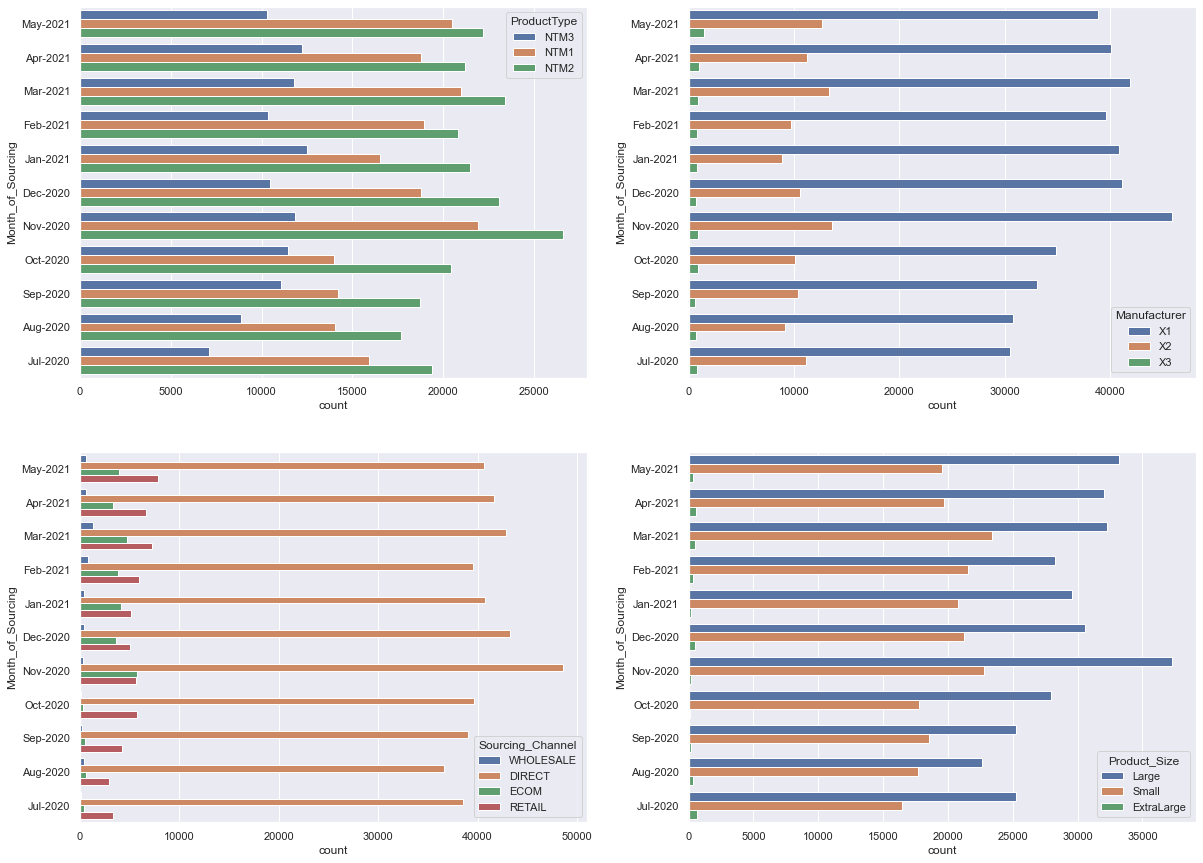

In [678]:
fig,axes = plt.subplots(2,2,figsize=(20,15))
sns.countplot(ax=axes[0,0],y='Month_of_Sourcing',hue='ProductType',data=df)
sns.countplot(ax=axes[0,1],y='Month_of_Sourcing',hue='Manufacturer',data=df)
sns.countplot(ax=axes[1,0],y='Month_of_Sourcing',hue='Sourcing_Channel',data=df)
sns.countplot(ax=axes[1,1],y='Month_of_Sourcing',hue='Product_Size',data=df)

### The instances of ecom sourcing is higher from Nov-2020 onwards. Possibly, some major ecom sourcing technology has been launched around that time.
### Seasonal variances can't be established with a lot of certainity since only a year's data is present. 

<AxesSubplot:xlabel='Sourcing_Cost', ylabel='Month_of_Sourcing'>

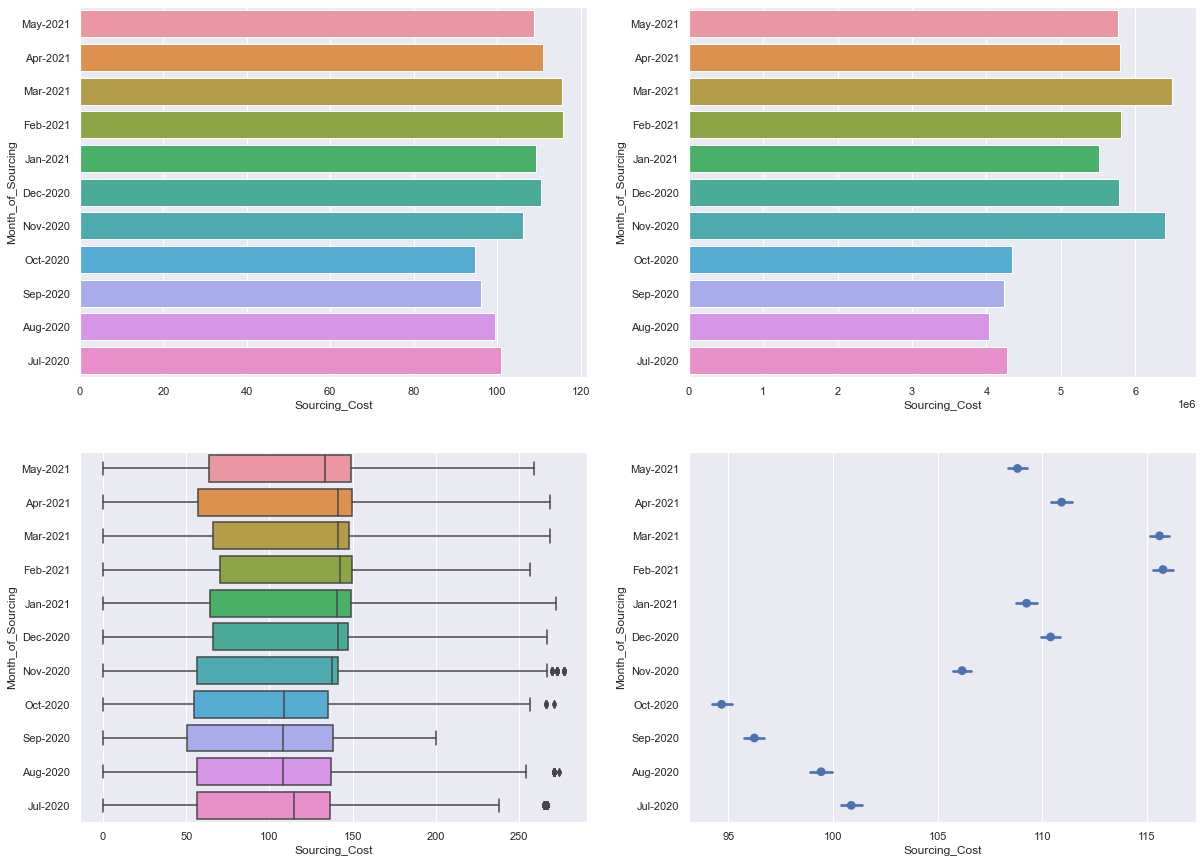

In [679]:
fig,axes = plt.subplots(2,2,figsize=(20,15))
sns.barplot(ax=axes[0,0],y='Month_of_Sourcing',x='Sourcing_Cost',data=df,estimator=np.mean,ci=None)
sns.barplot(ax=axes[0,1],y='Month_of_Sourcing',x='Sourcing_Cost',data=df,estimator=np.sum,ci=None)
sns.boxplot(ax=axes[1,0],y='Month_of_Sourcing',x='Sourcing_Cost',data=df)
sns.pointplot(ax=axes[1,1],y='Month_of_Sourcing',x='Sourcing_Cost',data=df,linestyles=' ')

### Between Oct and Nov 2020, the data skewness has shifted substantially to the left. i,e: in Nov 2020 a substanially high no of purchases have lower sourcing cost as compared to Oct 2020.

<AxesSubplot:xlabel='Product_Type', ylabel='Sourcing_Cost'>

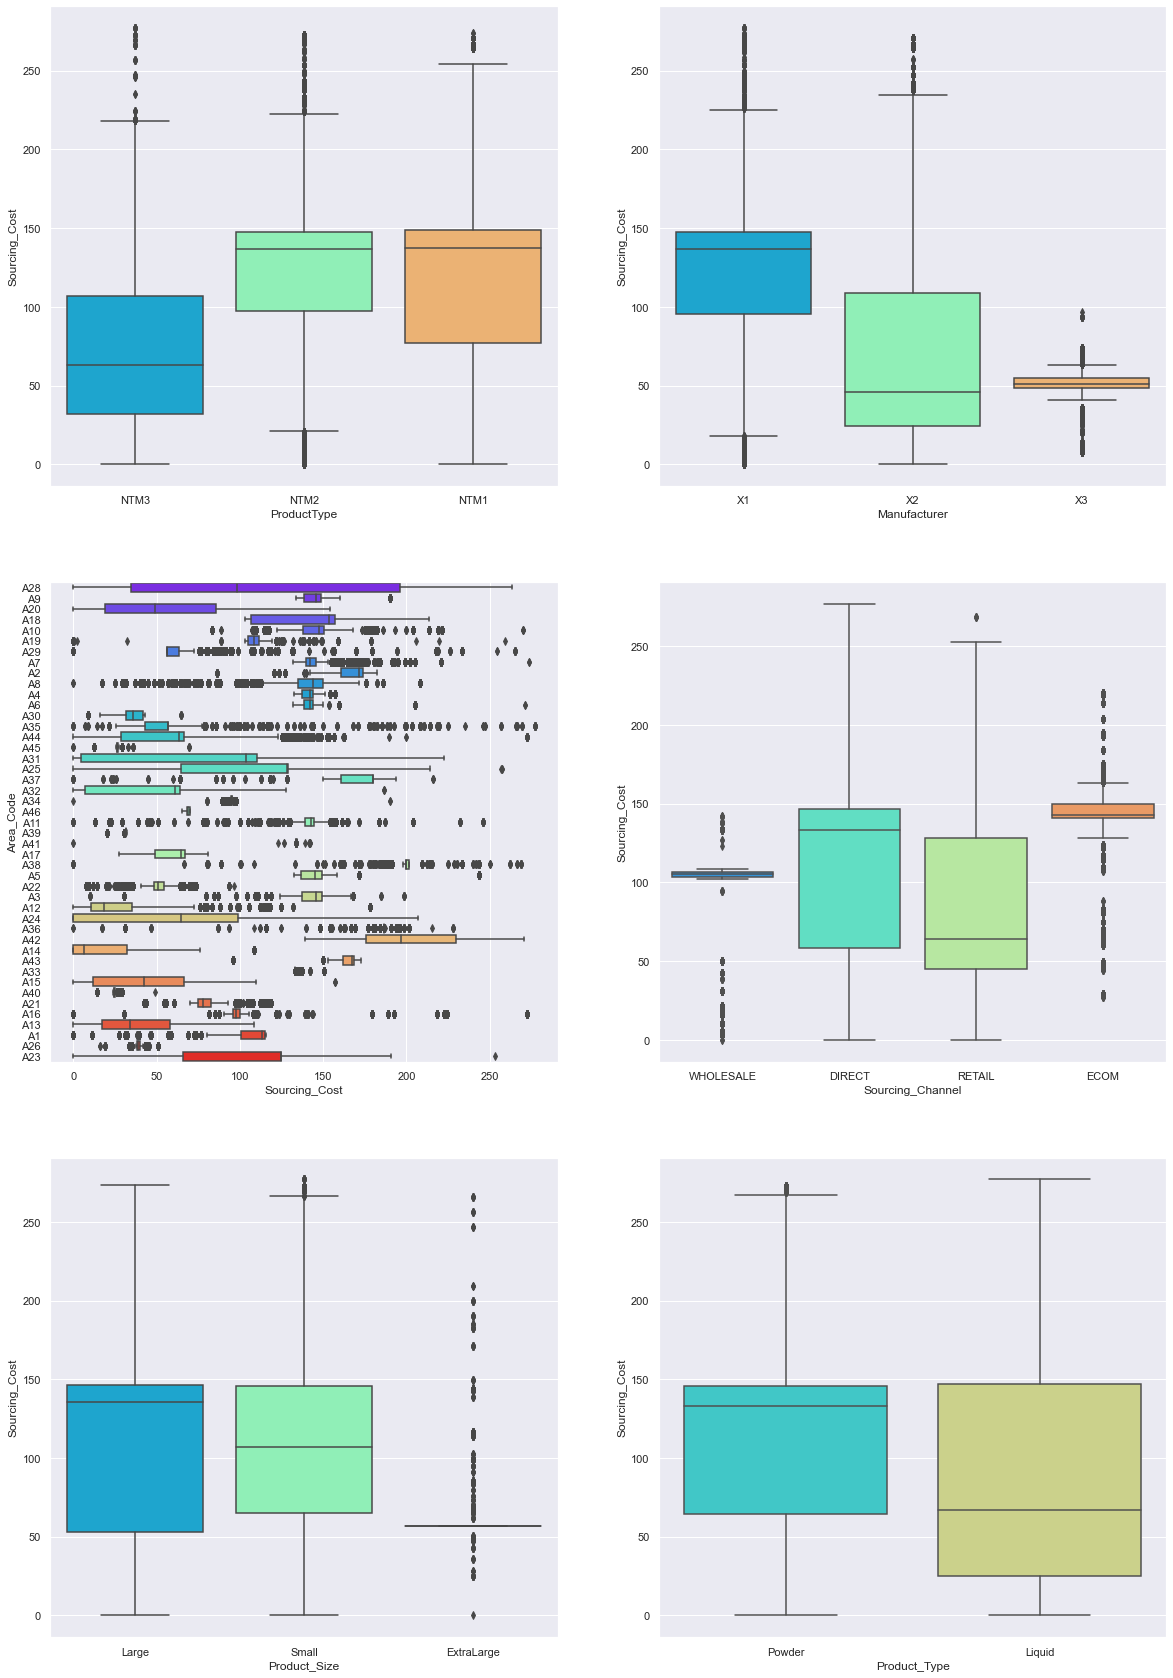

In [389]:
fig,axes = plt.subplots(3,2,figsize=(20,30))
sns.boxplot(ax=axes[0,0],y="Sourcing_Cost",x='ProductType',data=df,palette='rainbow')
sns.boxplot(ax=axes[0,1],y="Sourcing_Cost",x='Manufacturer',data=df,palette='rainbow')
sns.boxplot(ax=axes[1,0],x="Sourcing_Cost",y='Area_Code',data=df,palette='rainbow')
sns.boxplot(ax=axes[1,1],y="Sourcing_Cost",x='Sourcing_Channel',data=df,palette='rainbow')
sns.boxplot(ax=axes[2,0],y="Sourcing_Cost",x='Product_Size',data=df,palette='rainbow')
sns.boxplot(ax=axes[2,1],y="Sourcing_Cost",x='Product_Type',data=df,palette='rainbow')

### Median sourcing cost for NTM3 is much lower than NTM1 and NTM2. For NTM1 and NTM2 it is similar.
### Median cost for X1 is higher than X2. Median costs for X3 is slightly higher than X2 (Contradicting what I hypothesised earlier)
### The median cost for Ecom sourcing is higher all others (Maybe the reason why it is not preffered)
### Median costs for Large size products is higher than Small. The data for Extralarge products seems to have a large no of duplicate values and unique values are very limted.
### The median sourcing cost for Liquid is lower than powder


<AxesSubplot:xlabel='Sourcing_Cost', ylabel='Month_of_Sourcing'>

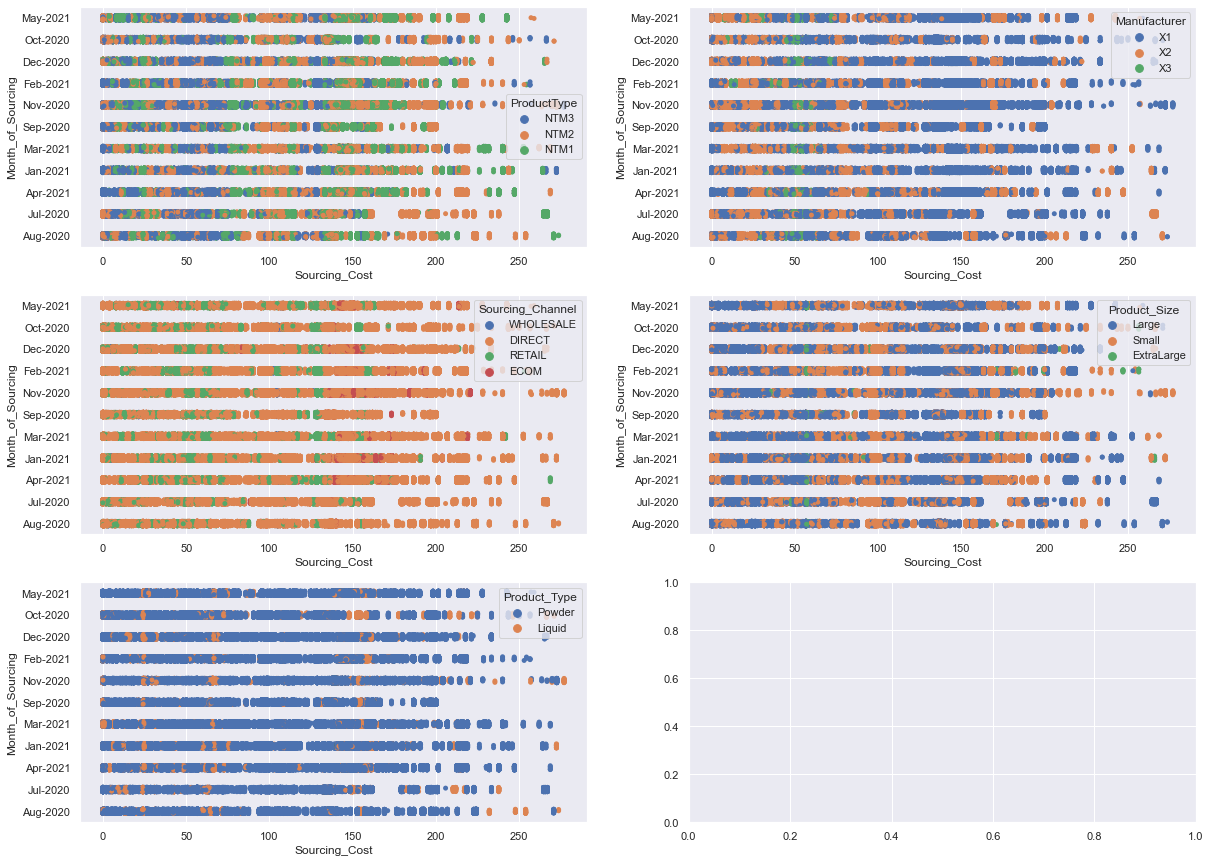

In [376]:
fig,axes = plt.subplots(3,2,figsize=(20,15))
sns.stripplot(ax=axes[0,0],y='Month_of_Sourcing',x='Sourcing_Cost',data=df,jitter= True, hue='ProductType')
sns.stripplot(ax=axes[0,1],y='Month_of_Sourcing',x='Sourcing_Cost',data=df,jitter= True, hue='Manufacturer')
sns.stripplot(ax=axes[1,0],y='Month_of_Sourcing',x='Sourcing_Cost',data=df,jitter= True, hue='Sourcing_Channel')
sns.stripplot(ax=axes[1,1],y='Month_of_Sourcing',x='Sourcing_Cost',data=df,jitter= True, hue='Product_Size')
sns.stripplot(ax=axes[2,0],y='Month_of_Sourcing',x='Sourcing_Cost',data=df,jitter= True, hue='Product_Type')

<Figure size 864x504 with 0 Axes>

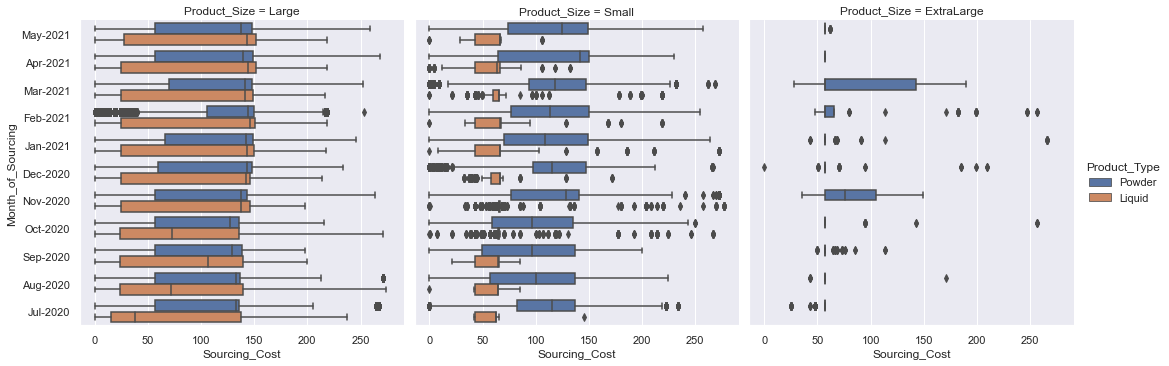

In [680]:
plt.figure(figsize=(12,7))
sns.catplot(y='Month_of_Sourcing',x='Sourcing_Cost',data=df,hue='Product_Type',col='Product_Size',kind='box')

### For large sized liquid products, median sourcing cost has changed over the months. i.e: lower median sourcing cost  in Jul 2020 and has gradually increased in the subsequent months. 

<Figure size 864x720 with 0 Axes>

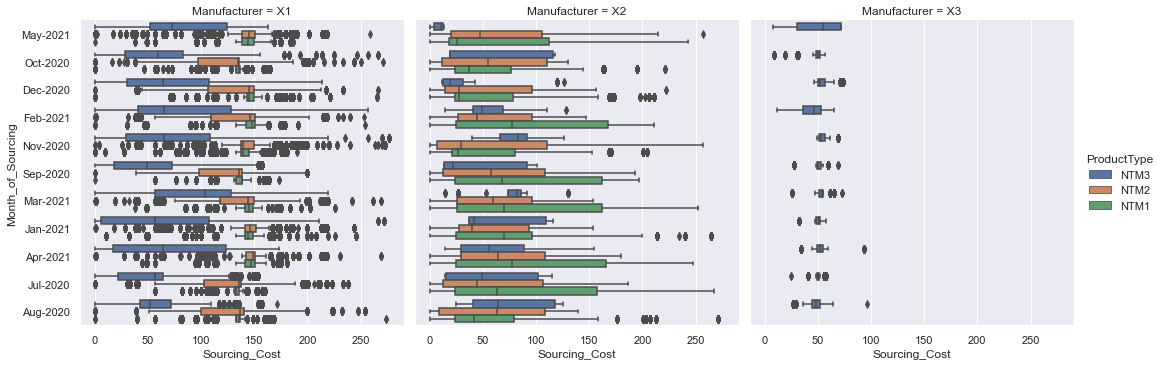

In [385]:
plt.figure(figsize=(12,10));
sns.catplot(y='Month_of_Sourcing',x='Sourcing_Cost',data=df,hue='ProductType',col='Manufacturer',kind='box')

### Manufacturer X1 has high instances of data duplication.
### Product types from manufacturer X2 show high monthly fluctuations, for ex: NTM3 from X2 is high in Oct 2020 while very low in March 2021. 

## <code style="background:black;color:white">ANOVA analysis to check if some feature doesn't impact sourcing cost

In [390]:
from statsmodels.stats.anova import _get_covariance,anova_lm
from statsmodels.formula.api import ols
formula = 'Sourcing_Cost ~ C(ProductType) + C(Manufacturer) + C(Area_Code) + C(Sourcing_Channel) + C(Product_Size) + C(Product_Type) + C(Month_of_Sourcing)'
model = ols(formula,df).fit()
aov_table = anova_lm(model)
aov_table

,df,sum_sq,mean_sq,F,PR(>F)
C(ProductType),2.0,2.320709e+08,1.160354e+08,165335.534960,0.000000e+00
C(Manufacturer),2.0,3.787681e+08,1.893841e+08,269847.885859,0.000000e+00
C(Area_Code),44.0,6.351565e+08,1.443538e+07,20568.549317,0.000000e+00
C(Sourcing_Channel),3.0,8.925621e+06,2.975207e+06,4239.286256,0.000000e+00
C(Product_Size),2.0,3.422404e+07,1.711202e+07,24382.424110,0.000000e+00
C(Product_Type),1.0,8.272105e+05,8.272105e+05,1178.668301,4.976269e-258
C(Month_of_Sourcing),10.0,5.742671e+06,5.742671e+05,818.256643,0.000000e+00
Residual,547453.0,3.842123e+08,7.018179e+02,NaN,NaN


### All the features have statistical significant impact on the sourcing cost (p <0.05). However, interdepedance of the features have not been captured

In [401]:
df.describe(include='all')

,ProductType,Manufacturer,Area_Code,Sourcing_Channel,Product_Size,Product_Type,Month_of_Sourcing,Sourcing_Cost
count,547517,547517,547517,547517,547517,547517,547517,547517.000000
unique,3,3,45,4,3,2,11,NaN
top,NTM2,X1,A28,DIRECT,Large,Powder,Nov-2020,NaN
freq,235011,417278,41800,451094,324134,469286,60282,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,106.755638
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,55.391775
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,57.710000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,131.202000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,145.918000


## <code style="background:black;color:white">Pivot tables showing various groupings of products

In [418]:
df.groupby(['ProductType','Manufacturer','Sourcing_Channel','Product_Type'])['Sourcing_Cost'].count()

ProductType  Manufacturer  Sourcing_Channel  Product_Type
NTM1         X1            DIRECT            Liquid           12097
                                             Powder           96986
                           ECOM              Powder           14994
             X2            DIRECT            Liquid           19055
                                             Powder           47353
                           RETAIL            Powder            4089
NTM2         X1            DIRECT            Liquid           16334
                                             Powder          154728
                           ECOM              Powder           14732
                           RETAIL            Powder            1107
                           WHOLESALE         Powder             118
             X2            DIRECT            Powder           25820
                           RETAIL            Powder           22172
NTM3         X1            DIRECT            Liquid       

In [419]:
df.groupby(['Product_Type','Sourcing_Channel','ProductType','Product_Size','Manufacturer'])['Sourcing_Cost'].count()

Product_Type  Sourcing_Channel  ProductType  Product_Size  Manufacturer
Liquid        DIRECT            NTM1         Large         X1              12097
                                                           X2              19055
                                NTM2         Large         X1              16334
                                NTM3         Large         X1               9424
                                             Small         X1              15043
              RETAIL            NTM3         Large         X1               6278
Powder        DIRECT            NTM1         Large         X1              67995
                                                           X2              20922
                                             Small         X1              28991
                                                           X2              26431
                                NTM2         Large         X1              63456
                                     

In [422]:
X=df[df['Product_Type']=='Liquid']
X.groupby(['Sourcing_Channel','Area_Code','Manufacturer','Product_Size','Product_Type'])['Sourcing_Cost'].count()

Sourcing_Channel  Area_Code  Manufacturer  Product_Size  Product_Type
DIRECT            A11        X1            Large         Liquid           6529
                  A14        X1            Large         Liquid           9424
                  A2         X1            Large         Liquid            875
                  A28        X1            Large         Liquid           3050
                  A3         X1            Large         Liquid           5303
                  A31        X2            Large         Liquid           1479
                  A35        X1            Small         Liquid           4395
                  A39        X2            Large         Liquid           1702
                  A40        X2            Large         Liquid          13820
                  A44        X1            Small         Liquid          10648
                             X2            Large         Liquid           2054
                  A6         X1            Large         Liqu

## <code style="background:black;color:white">Model fitting

In [440]:
d1=df.copy()
d1.duplicated().sum()

539120

In [441]:
d1.drop_duplicates(keep='first',inplace=True)

In [442]:
d1

,ProductType,Manufacturer,Area_Code,Sourcing_Channel,Product_Size,Product_Type,Month_of_Sourcing,Sourcing_Cost
0,NTM3,X1,A28,WHOLESALE,Large,Powder,May-2021,1.015800e+01
1,NTM2,X1,A9,DIRECT,Large,Powder,Oct-2020,1.342810e+02
2,NTM3,X2,A20,DIRECT,Large,Powder,Dec-2020,1.245600e+01
3,NTM3,X1,A18,WHOLESALE,Small,Powder,Feb-2021,1.072200e+02
4,NTM2,X1,A28,DIRECT,Large,Liquid,Nov-2020,1.977630e+02
...,...,...,...,...,...,...,...,...
543027,NTM3,X1,A44,DIRECT,Small,Liquid,Jan-2021,6.763000e+01
544592,NTM3,X1,A44,DIRECT,Small,Liquid,Jul-2020,6.325000e+01
544897,NTM2,X2,A31,DIRECT,Large,Powder,Sep-2020,9.020562e-16
545699,NTM2,X1,A10,DIRECT,Small,Powder,Sep-2020,1.338500e+02


In [446]:
d1.reset_index(drop=True,inplace=True)

In [447]:
d1.describe(include='all')

,ProductType,Manufacturer,Area_Code,Sourcing_Channel,Product_Size,Product_Type,Month_of_Sourcing,Sourcing_Cost
count,8397,8397,8397,8397,8397,8397,8397,8397.000000
unique,3,3,45,4,3,2,11,NaN
top,NTM2,X1,A44,DIRECT,Large,Powder,Nov-2020,NaN
freq,3536,5689,1205,6617,4551,6179,853,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,95.162766
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,58.438557
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,49.856000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,99.393000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,141.448000


<AxesSubplot:xlabel='Product_Type', ylabel='Sourcing_Cost'>

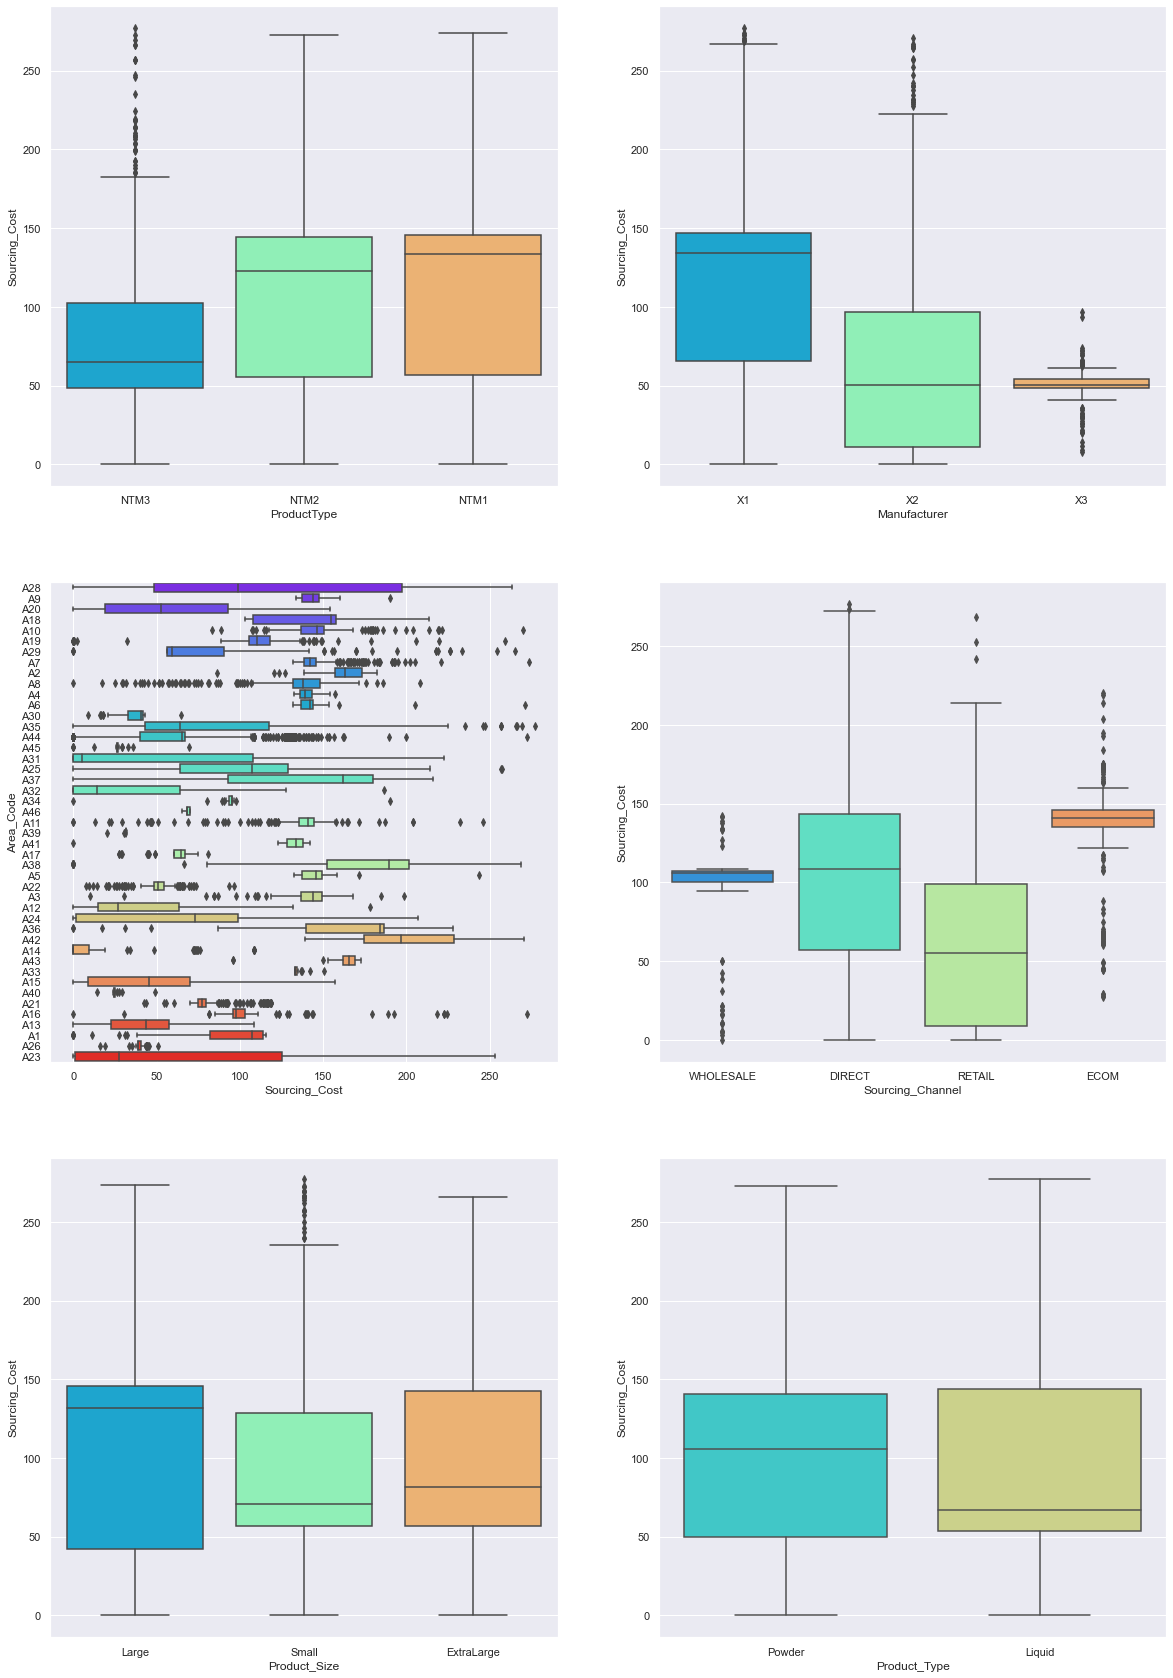

In [538]:
fig,axes = plt.subplots(3,2,figsize=(20,30))
sns.boxplot(ax=axes[0,0],y="Sourcing_Cost",x='ProductType',data=d1,palette='rainbow')
sns.boxplot(ax=axes[0,1],y="Sourcing_Cost",x='Manufacturer',data=d1,palette='rainbow')
sns.boxplot(ax=axes[1,0],x="Sourcing_Cost",y='Area_Code',data=d1,palette='rainbow')
sns.boxplot(ax=axes[1,1],y="Sourcing_Cost",x='Sourcing_Channel',data=d1,palette='rainbow')
sns.boxplot(ax=axes[2,0],y="Sourcing_Cost",x='Product_Size',data=d1,palette='rainbow')
sns.boxplot(ax=axes[2,1],y="Sourcing_Cost",x='Product_Type',data=d1,palette='rainbow')

### The variable area has a lot of outliers at all levels.  

## <code style="background:black;color:white">Checking interdependance of categorical variables using Chi-squared test

In [499]:
from scipy.stats import chi2_contingency
for i in d1.columns: 
    if i != 'ProductType':
        x=chi2_contingency(pd.crosstab(d1['ProductType'],d1[i]))[1]
        print ('p-value for ProductType and',i,'is',x)

p-value for ProductType and Manufacturer is 9.96777102389936e-309
p-value for ProductType and Area_Code is 0.0
p-value for ProductType and Sourcing_Channel is 2.648650595947768e-163
p-value for ProductType and Product_Size is 3.2412784853725405e-107
p-value for ProductType and Product_Type is 6.519866406164829e-161
p-value for ProductType and Month_of_Sourcing is 0.14052397281618717
p-value for ProductType and Sourcing_Cost is 3.415325889953414e-25


In [500]:
from scipy.stats import chi2_contingency
for i in d1.columns: 
    if i != 'Manufacturer':
        x=chi2_contingency(pd.crosstab(d1['Manufacturer'],d1[i]))[1]
        print ('p-value for Manufacturer and',i,'is',x)

p-value for Manufacturer and ProductType is 9.96777102389936e-309
p-value for Manufacturer and Area_Code is 0.0
p-value for Manufacturer and Sourcing_Channel is 0.0
p-value for Manufacturer and Product_Size is 3.253256773780691e-42
p-value for Manufacturer and Product_Type is 6.92119794418242e-42
p-value for Manufacturer and Month_of_Sourcing is 2.0107154137902867e-10
p-value for Manufacturer and Sourcing_Cost is 1.3107746507053728e-100


In [501]:
from scipy.stats import chi2_contingency
for i in d1.columns: 
    if i != 'Area_Code':
        x=chi2_contingency(pd.crosstab(d1['Area_Code'],d1[i]))[1]
        print ('p-value for Area_Code and',i,'is',x)

p-value for Area_Code and ProductType is 0.0
p-value for Area_Code and Manufacturer is 0.0
p-value for Area_Code and Sourcing_Channel is 0.0
p-value for Area_Code and Product_Size is 0.0
p-value for Area_Code and Product_Type is 0.0
p-value for Area_Code and Month_of_Sourcing is 1.2548655542689724e-14
p-value for Area_Code and Sourcing_Cost is 0.0


In [508]:
pd.crosstab(d1['ProductType'],d1['Area_Code'])

Area_Code,A1,A10,A11,A12,A13,A14,A15,A16,A17,A18,...,A42,A43,A44,A45,A46,A5,A6,A7,A8,A9
ProductType,,,,,,,,,,,,,,,,,,,,,
NTM1,104,105,94,126,0,0,0,0,0,0,...,74,39,226,62,13,0,41,188,164,78
NTM2,0,109,207,0,0,0,0,126,41,0,...,0,0,319,67,0,94,75,196,83,43
NTM3,0,31,96,0,103,104,109,0,0,144,...,0,0,660,0,0,0,0,0,165,0


In [502]:
from scipy.stats import chi2_contingency
for i in d1.columns: 
    if i != 'Sourcing_Channel':
        x=chi2_contingency(pd.crosstab(d1['Sourcing_Channel'],d1[i]))[1]
        print ('p-value for Sourcing_Channel and',i,'is',x)

p-value for Sourcing_Channel and ProductType is 2.6486505959476168e-163
p-value for Sourcing_Channel and Manufacturer is 0.0
p-value for Sourcing_Channel and Area_Code is 0.0
p-value for Sourcing_Channel and Product_Size is 3.1480485376322213e-12
p-value for Sourcing_Channel and Product_Type is 3.5983079525757835e-108
p-value for Sourcing_Channel and Month_of_Sourcing is 6.708314418416901e-06
p-value for Sourcing_Channel and Sourcing_Cost is 2.3278367262544872e-38


In [503]:
from scipy.stats import chi2_contingency
for i in d1.columns: 
    if i != 'Product_Size':
        x=chi2_contingency(pd.crosstab(d1['Product_Size'],d1[i]))[1]
        print ('p-value for Product_Size and',i,'is',x)

p-value for Product_Size and ProductType is 3.2412784853726325e-107
p-value for Product_Size and Manufacturer is 3.253256773780691e-42
p-value for Product_Size and Area_Code is 0.0
p-value for Product_Size and Sourcing_Channel is 3.1480485376321987e-12
p-value for Product_Size and Product_Type is 4.085362835402552e-25
p-value for Product_Size and Month_of_Sourcing is 0.0019682959411456225
p-value for Product_Size and Sourcing_Cost is 8.108036487361709e-47


In [504]:
from scipy.stats import chi2_contingency
for i in d1.columns: 
    if i != 'Product_Type':
        x=chi2_contingency(pd.crosstab(d1['Product_Type'],d1[i]))[1]
        print ('p-value for Product_Type and',i,'is',x)

p-value for Product_Type and ProductType is 6.519866406164829e-161
p-value for Product_Type and Manufacturer is 6.921197944182519e-42
p-value for Product_Type and Area_Code is 0.0
p-value for Product_Type and Sourcing_Channel is 3.5983079525758864e-108
p-value for Product_Type and Product_Size is 4.0853628354024927e-25
p-value for Product_Type and Month_of_Sourcing is 0.542683934689349
p-value for Product_Type and Sourcing_Cost is 0.002762653215008845


## <code style="background:black;color:white">Product type and month of sourcing have no interaction 
## <code style="background:black;color:white">All other pairs are interacting with each other

### I'll be applying Label Encoding to the variables 'Area_Code' and 'Month_of_Sourcing' (because of high levels present in these features) and One Hot encoding to the rest for proceeding with redression models. 


### Before that I've concatenated the training and test data so that the encoding is uniform.

In [581]:
dtest=pd.read_excel('DS_ML Coding Challenge Dataset.xlsx',sheet_name='Test Dataset')
dtest.columns = [c.replace(' ', '_') for c in dtest.columns]
dtest['Month_of_Sourcing']=dtest.Month_of_Sourcing.dt.strftime('%b-%Y')
dtest

,ProductType,Manufacturer,Area_Code,Sourcing_Channel,Product_Size,Product_Type,Month_of_Sourcing,Sourcing_Cost
0,NTM1,X1,A1,DIRECT,Small,Powder,Jun-2021,103.68
1,NTM1,X1,A10,DIRECT,Large,Powder,Jun-2021,155.75
2,NTM1,X1,A10,ECOM,Large,Powder,Jun-2021,143.02
3,NTM1,X1,A11,DIRECT,Large,Powder,Jun-2021,139.39
4,NTM1,X1,A2,DIRECT,Large,Powder,Jun-2021,169.42
...,...,...,...,...,...,...,...,...
91,NTM3,X1,A44,DIRECT,Small,Liquid,Jun-2021,89.57
92,NTM3,X1,A8,DIRECT,Large,Powder,Jun-2021,114.57
93,NTM3,X1,A8,DIRECT,Small,Powder,Jun-2021,111.26
94,NTM3,X2,A20,DIRECT,Large,Powder,Jun-2021,32.32


### <code style="background:black;color:white">Data concatenation

In [582]:
dglobal= pd.concat([d1,dtest],axis=0)
in_gl = dglobal.drop('Sourcing_Cost',axis=1)
t_gl = dglobal.Sourcing_Cost

### <code style="background:black;color:white">Label encoding

In [584]:
from sklearn.preprocessing import LabelEncoder
le_AC=LabelEncoder()
le_MOS=LabelEncoder()
in_gl['Area_Code_n'] = le_AC.fit_transform(in_gl['Area_Code'])
in_gl['Month_of_Sourcing_n'] = le_MOS.fit_transform(in_gl['Month_of_Sourcing'])
in_gl.drop(['Area_Code','Month_of_Sourcing'],axis='columns',inplace=True)
in_gl.head()

,ProductType,Manufacturer,Sourcing_Channel,Product_Size,Product_Type,Area_Code_n,Month_of_Sourcing_n
0,NTM3,X1,WHOLESALE,Large,Powder,19,8
1,NTM2,X1,DIRECT,Large,Powder,44,10
2,NTM3,X2,DIRECT,Large,Powder,12,2
3,NTM3,X1,WHOLESALE,Small,Powder,9,3
4,NTM2,X1,DIRECT,Large,Liquid,19,9


### <code style="background:black;color:white">One HOt encoding

In [ ]:
c=["ProductType", "Manufacturer","Sourcing_Channel","Product_Size","Product_Type"]
dummies=pd.get_dummies(in_gl[c], columns=c,drop_first=True)
in_gl = pd.concat([in_gl, dummies], axis=1)
in_gl.drop(c,axis=1,inplace=True)

In [587]:
in_gl.head()

,Area_Code_n,Month_of_Sourcing_n,ProductType_NTM2,ProductType_NTM3,Manufacturer_X2,Manufacturer_X3,Sourcing_Channel_ECOM,Sourcing_Channel_RETAIL,Sourcing_Channel_WHOLESALE,Product_Size_Large,Product_Size_Small,Product_Type_Powder
0,19,8,0,1,0,0,0,0,1,1,0,1
1,44,10,1,0,0,0,0,0,0,1,0,1
2,12,2,0,1,1,0,0,0,0,1,0,1
3,9,3,0,1,0,0,0,0,1,0,1,1
4,19,9,1,0,0,0,0,0,0,1,0,0


### <code style="background:black;color:white">Test and Train data spilt

In [591]:
in_test = in_gl.tail(96)
tar_test = t_gl.tail(96)
in_train = in_gl.head((in_gl.shape[0]-96))
tar_train = t_gl.head((in_gl.shape[0]-96))

In [593]:
X = in_train.values
y = tar_train.values

## <code style="background:black;color:white">Simple Linear regression

In [594]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model1 = LinearRegression()
model.fit(X,y)

LinearRegression()

In [595]:
model.score(X,y)

0.36146215198026843

### <code style="background:black;color:white">Score is extremely low on training data itself. 
### <code style="background:black;color:white">Hence, Polynomial regression has been tried.

In [596]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=3)
X_poly = poly_reg.fit_transform(X)
pol_reg = LinearRegression()
pol_reg.fit(X_poly, y)

LinearRegression()

In [597]:
pol_reg.score(X_poly, y)

0.6151272071264782

### <code style="background:black;color:white">Improved score on the Training data, but still low.
### <code style="background:black;color:white">I've tried using KNN model fitting on the Data set

### <code style="background:black;color:white">Elbow graph to determine the no of K in KNN model

In [598]:
from sklearn.cluster import KMeans
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(inputohe,target)
    sse.append(km.inertia_)

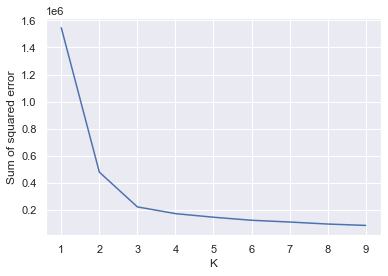

In [535]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)

### <code style="background:black;color:white">K=3 shows the elbow

In [630]:
from sklearn.neighbors import KNeighborsRegressor
reg = KNeighborsRegressor(n_neighbors=3)
reg.fit(X,y)

KNeighborsRegressor(n_neighbors=3)

In [631]:
reg.score(X,y)

0.6928921708053463

In [632]:
reg.score(in_test.values,tar_test.values)

0.47826353743182604

### <code style="background:black;color:white">Score improved, but since the no. of data sets are high, a low K may result in overfitting.
### <code style="background:black;color:white">Checking the model score on training and test data for various K

In [633]:
k_r = range(3,15)
for i in k_r:
    reg = KNeighborsRegressor(n_neighbors=i)
    reg.fit(X,y)
    s1=reg.score(X,y)
    s2=reg.score(in_test.values,tar_test.values)
    print('For K=',i,'Training data score is',round(s1,2),'test data score is',round(s2,2))

For K= 3 Training data score is 0.69 test data score is 0.48
For K= 4 Training data score is 0.71 test data score is 0.55
For K= 5 Training data score is 0.71 test data score is 0.56
For K= 6 Training data score is 0.73 test data score is 0.59
For K= 7 Training data score is 0.73 test data score is 0.6
For K= 8 Training data score is 0.73 test data score is 0.62
For K= 9 Training data score is 0.73 test data score is 0.6
For K= 10 Training data score is 0.73 test data score is 0.64
For K= 11 Training data score is 0.73 test data score is 0.63
For K= 12 Training data score is 0.73 test data score is 0.61
For K= 13 Training data score is 0.72 test data score is 0.61
For K= 14 Training data score is 0.72 test data score is 0.59


### K=10 gives the best fit

### <code style="background:black;color:white">The final model is 

In [682]:
reg = KNeighborsRegressor(n_neighbors=10)
reg.fit(X,y)

KNeighborsRegressor(n_neighbors=10)

In [683]:
reg.score(X,y)

0.7299658861466068

In [684]:
reg.score(in_test.values,tar_test.values)

0.6406941455277886